# Similarities and Differences between Categories (Pt.1 - Age, Gender, Won/Lost Amount)

In [1]:
# Define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
import plotting_fn as pf
import counting_fns as cf

month_file = '6_October'
cut_off = 10000
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file)


In [2]:
# Read in data
df = pd.read_parquet("classification.parquet")


# Eliminate players who maximum number of gambles is 1
df = df.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)


# Reset index
df.index = np.arange(1, len(df) + 1)


# Round wageredamt and profit to 2 decimal places
df['wageredamt'] = df['wageredamt'].round(1)
df['profit'] = df['profit'].round(1)
df['percent_return'] = df['percent_return'].round(1)


In [3]:
# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df['result_type'] = df['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df = pd.concat([df, dummy_variables], axis=1).reset_index(drop=True)

# Convert starttime to delte format for operations
df['start_time'] = pd.to_datetime(df['start_time'])

In [4]:
# Create new column called 'time_diff' which is the difference between the start time of the gamble and the start time of the previous gamble
df['time_diff'] = df.groupby(['playerkey', 'session_time'])['start_time'].diff()

# Convert time_diff to seconds
df['time_diff'] = df['time_diff'].dt.total_seconds().fillna(0)

## General Overview

### Players, Visits, Sessions of Each Group

In [5]:
# Number of gamblers
print("Number of gamblers in dataframe:", len(df['playerkey'].unique()))
print('--------------------------------------------------')

# Print number of unique visits
print("Number of unique visits in dtf:", len(df['visit'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions
print("Number of unique sessions in dtf:", len(df['session_time'].unique()))
print('--------------------------------------------------')

Number of gamblers in dataframe: 5548
--------------------------------------------------
Number of unique visits in dtf: 10
--------------------------------------------------
Number of unique sessions in dtf: 10
--------------------------------------------------


### Wins in a row

In [6]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per session_time per player
df = pf.consecutive_wins(df, 'visit')

In [7]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Categories of wins in a row per visit:')
print(df.groupby(['clasification', 'visit'])[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')


Categories of wins in a row per visit:
                        #2ws    #3ws   #4ws
clasification visit                        
extreme_r     1      12806.0  2444.0  757.0
              2       7417.0  1353.0  483.0
              3       3385.0   647.0  205.0
              4       1301.0   228.0  115.0
              5        450.0    72.0   28.0
              6        131.0    27.0   15.0
              7         39.0    19.0   15.0
              8         67.0    20.0   14.0
              9          2.0     0.0    0.0
              10        17.0     2.0    0.0
high_r        1       4065.0   711.0  217.0
              2        854.0   153.0   56.0
              3        161.0    31.0    4.0
              4         16.0     2.0    0.0
              5         10.0     3.0    1.0
low_r         1       1800.0   294.0   85.0
              2        161.0    32.0   13.0
              3         20.0     3.0    0.0
              4          4.0     0.0    0.0
minimum_r     1        423.0    77.0 

### Gender Differences

In [8]:
# Gender differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'gender'])['playerkey'].nunique())
print('--------------------------------------------------')

Number of unique players in dtf:
clasification  gender
extreme_r      F         691
               M         703
high_r         F         659
               M         741
low_r          F         682
               M         713
minimum_r      F         670
               M         689
Name: playerkey, dtype: int64
--------------------------------------------------


### Age Differences

In [9]:
# Create age ranges 
bins = [0, 24, 40, 55, 75, 150]
labels = ['18-24', '25-40', '41-55', '56-75', '76+']
generations = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers', 'Silent']

# Use cut function to create age ranges for dtf and top 20%
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['age_gen'] = pd.cut(df['age'], bins=bins, labels=generations, right=False)

In [10]:
# Age range differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'age_range'])['playerkey'].nunique())
print('--------------------------------------------------')


Number of unique players in dtf:
clasification  age_range
extreme_r      18-24         14
               25-40        259
               41-55        490
               56-75        581
               76+           50
high_r         18-24         20
               25-40        353
               41-55        489
               56-75        509
               76+           29
low_r          18-24         19
               25-40        370
               41-55        465
               56-75        506
               76+           35
minimum_r      18-24         35
               25-40        472
               41-55        453
               56-75        372
               76+           27
Name: playerkey, dtype: int64
--------------------------------------------------


In [11]:
# Age generation differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'age_gen'])['playerkey'].nunique())
print('--------------------------------------------------')

Number of unique players in dtf:
clasification  age_gen     
extreme_r      Gen Z            14
               Millenials      259
               Gen X           490
               Baby Boomers    581
               Silent           50
high_r         Gen Z            20
               Millenials      353
               Gen X           489
               Baby Boomers    509
               Silent           29
low_r          Gen Z            19
               Millenials      370
               Gen X           465
               Baby Boomers    506
               Silent           35
minimum_r      Gen Z            35
               Millenials      472
               Gen X           453
               Baby Boomers    372
               Silent           27
Name: playerkey, dtype: int64
--------------------------------------------------


Male age differences in dtf:
age_range
18-24      42
25-40     812
41-55    1018
56-75     898
76+        76
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in dtf:
age_range
18-24      46
25-40     642
41-55     879
56-75    1070
76+        65
Name: playerkey, dtype: int64


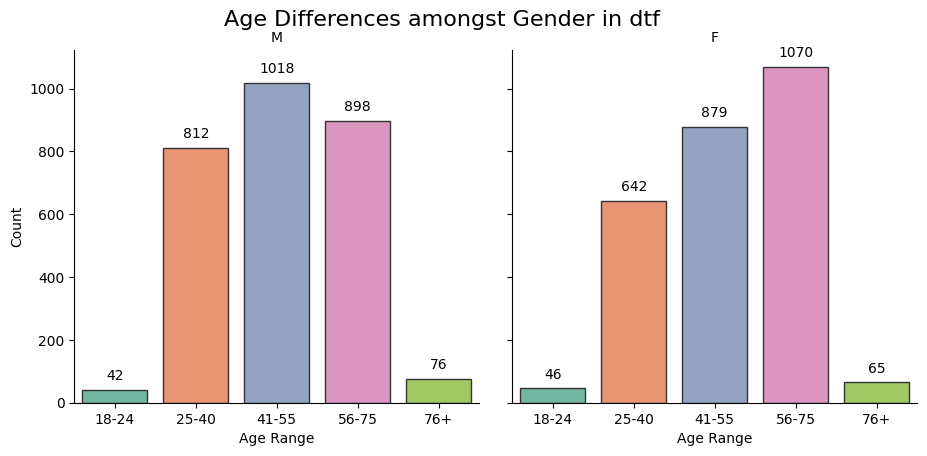

In [12]:
# Age range of male gamblers in dtf
print("Male age differences in dtf:")
print(df[df['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of Female gamblers in dtf
print('Female age differences in dtf:')
print(df[df['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())

pf.plot_gender_diff(df, 'dtf', figsize=(10, 5))


### Increse and Decrease of SlotDenomination and Bet

In [13]:
# Lets do the same but for bottom 20%
players_increase_slot = cf.count_increase(df, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot = cf.count_decrease(df, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet = cf.count_increase(df, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet = cf.count_decrease(df, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 2052
Count of times each player increase_slotdeno : {20: 189, 73: 8, 156: 5, 224: 15, 646: 2, 719: 1, 865: 2, 1069: 1, 1166: 11, 1233: 42, 1371: 2, 1408: 2, 1442: 3, 1959: 7, 2029: 2, 2070: 1, 2073: 1, 2099: 1, 2331: 4, 2710: 2, 3127: 18, 3260: 2, 3385: 4, 3634: 25, 3653: 6, 3677: 3, 3726: 1, 3955: 1, 4252: 1, 4265: 5, 4860: 2, 4970: 5, 5113: 10, 5147: 4, 5443: 1, 5879: 28, 5969: 13, 6234: 3, 6271: 13, 6292: 4, 6365: 21, 6695: 4, 6829: 1, 6954: 2, 7195: 1, 7337: 2, 7420: 1, 7689: 5, 7695: 6, 7774: 1, 7933: 3, 7967: 4, 8005: 3, 8233: 262, 8288: 1, 8412: 3, 8446: 12, 8465: 2, 8613: 1, 8827: 3, 8978: 19, 9011: 4, 9031: 4, 9222: 2, 9310: 1, 9510: 9, 10119: 2, 10248: 5, 10348: 1, 10349: 2, 10598: 1, 10738: 249, 11308: 2, 11309: 3, 11427: 6, 11474: 1, 11526: 1, 11584: 2, 11589: 2, 11821: 2, 11868: 2, 11947: 1, 12192: 2, 12277: 22, 12356: 7, 12437: 1, 12562: 1, 12692: 2, 13312: 3, 13910: 7, 14128: 1, 14443: 2, 14778: 1, 14868: 6, 15389: 36, 15612: 5, 1

### Wealth Differences
#### General

In [14]:
# Lets crate a column called 'depletion_slope' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df['depletion_rate'] = df.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)


# Observe all the NaN Values

In [15]:
# Count how many Nan values are in df
print("Number of Nan values in df:", df.isna().sum().sum())

# Print the columns with Nan values
print("Columns with Nan values in df:", df.columns[df.isna().any()].tolist())

Number of Nan values in df: 10749
Columns with Nan values in df: ['profit/bet']


#### Per Visit

In [16]:
# Define the chunk size (number of rows in each chunk)
chunk_size = 15000

# Split the original DataFrame df into chunks
df_chunks = [df[i:i + chunk_size] for i in range(0, df.shape[0], chunk_size)]

# Initialize an empty list to store the results from each chunk
results = []

# Loop through each chunk of the DataFrame
for chunk_df in df_chunks:
    # Process the chunk using the transform_ml function
    df_ML_v_chunk = pf.transform_ml(data_b=chunk_df, grouping='visit')
    
    # Append the result of this chunk to the results list
    results.append(df_ML_v_chunk)

    # Print chunk number read
    print("Chunk number:", len(results))

# Combine the results from all chunks into a final DataFrame
df_ML_v = pd.concat(results)

# Now 'df_ML_v' contains the results from all chunks combined into a single DataFrame

Chunk number: 1
Chunk number: 2
Chunk number: 3
Chunk number: 4
Chunk number: 5
Chunk number: 6
Chunk number: 7
Chunk number: 8
Chunk number: 9
Chunk number: 10
Chunk number: 11
Chunk number: 12
Chunk number: 13
Chunk number: 14
Chunk number: 15
Chunk number: 16
Chunk number: 17
Chunk number: 18
Chunk number: 19
Chunk number: 20
Chunk number: 21
Chunk number: 22
Chunk number: 23
Chunk number: 24
Chunk number: 25
Chunk number: 26
Chunk number: 27
Chunk number: 28
Chunk number: 29
Chunk number: 30
Chunk number: 31
Chunk number: 32
Chunk number: 33
Chunk number: 34
Chunk number: 35
Chunk number: 36
Chunk number: 37
Chunk number: 38
Chunk number: 39
Chunk number: 40
Chunk number: 41
Chunk number: 42
Chunk number: 43
Chunk number: 44
Chunk number: 45
Chunk number: 46
Chunk number: 47
Chunk number: 48
Chunk number: 49
Chunk number: 50
Chunk number: 51
Chunk number: 52
Chunk number: 53
Chunk number: 54
Chunk number: 55
Chunk number: 56
Chunk number: 57
Chunk number: 58
Chunk number: 59
Chunk 

In [17]:
# Print number of unique players
print("Number of unique players in df_ML_v: ", df_ML_v['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy_v = df_ML_v[df_ML_v.isna().any(axis=1)]['playerkey'].unique()

# print number of discrepancies
print("Number of discrepancies:", len(list_discrepancy_v))

# Remove players with NaN values
df_ML_v = df_ML_v[~df_ML_v['playerkey'].isin(list_discrepancy_v)]

# Print number of unique players with no NaN values
print("Number of unique players w/o discrepancies: ", df_ML_v['playerkey'].nunique())

Number of unique players in df_ML_v:  5548
Number of discrepancies: 120
Number of unique players w/o discrepancies:  5428


In [18]:
print(df_ML_v.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'visit', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine','classification']


df_ML_v = df_ML_v.reindex(columns=desired_order)

# Save dataframe to paquet file
df_ML_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_visit_ALL.parquet')

Index(['playerkey', 'visit', 'gender', 'age_range', 'age_gen', 'beginning_amt',
       'ending_amt', 'ending_balance', 'ave_slotdenom', 'std_slotdenom',
       'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'classification', 'unique_machines', 'ave_time_per_machine', 'w/min',
       'l/min', 'nh/min', 'd/min', '2ws/min

#### Per Session

In [19]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per visit per player
df_s = pf.consecutive_wins(df, 'session_time')

In [20]:
# Define the chunk size (number of rows in each chunk)
chunk_size = 15000

# Split the original DataFrame df into chunks
df_chunks = [df_s[i:i + chunk_size] for i in range(0, df_s.shape[0], chunk_size)]

# Initialize an empty list to store the results from each chunk
results = []

# Loop through each chunk of the DataFrame
for chunk_df in df_chunks:
    # Process the chunk using the transform_ml function
    df_ML_s_chunk = pf.transform_ml(data_b=chunk_df, grouping='session_time')
    
    # Append the result of this chunk to the results list
    results.append(df_ML_s_chunk)

    # Print chunk number read
    print("Chunk number:", len(results))

# Combine the results from all chunks into a final DataFrame
df_ML_s = pd.concat(results)


Chunk number: 1
Chunk number: 2
Chunk number: 3
Chunk number: 4
Chunk number: 5
Chunk number: 6
Chunk number: 7
Chunk number: 8
Chunk number: 9
Chunk number: 10
Chunk number: 11
Chunk number: 12
Chunk number: 13
Chunk number: 14
Chunk number: 15
Chunk number: 16
Chunk number: 17
Chunk number: 18
Chunk number: 19
Chunk number: 20
Chunk number: 21
Chunk number: 22
Chunk number: 23
Chunk number: 24
Chunk number: 25
Chunk number: 26
Chunk number: 27
Chunk number: 28
Chunk number: 29
Chunk number: 30
Chunk number: 31
Chunk number: 32
Chunk number: 33
Chunk number: 34
Chunk number: 35
Chunk number: 36
Chunk number: 37
Chunk number: 38
Chunk number: 39
Chunk number: 40
Chunk number: 41
Chunk number: 42
Chunk number: 43
Chunk number: 44
Chunk number: 45
Chunk number: 46
Chunk number: 47
Chunk number: 48
Chunk number: 49
Chunk number: 50
Chunk number: 51
Chunk number: 52
Chunk number: 53
Chunk number: 54
Chunk number: 55
Chunk number: 56
Chunk number: 57
Chunk number: 58
Chunk number: 59
Chunk 

In [21]:
# Print number of unique players
print("Number of unique players in df_ML_v: ", df_ML_s['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy_s = df_ML_s[df_ML_s.isna().any(axis=1)]['playerkey'].unique()

# print number of discrepancies
print("Number of discrepancies:", len(list_discrepancy_s))

# Remove players with NaN values
df_ML_s = df_ML_s[~df_ML_s['playerkey'].isin(list_discrepancy_s)]

# Print number of unique players with no NaN values
print("Number of unique players w/o discrepancies: ", df_ML_s['playerkey'].nunique())

Number of unique players in df_ML_v:  5548
Number of discrepancies: 126
Number of unique players w/o discrepancies:  5422


In [22]:
print(df_ML_s.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine','classification']

df_ML_s = df_ML_s.reindex(columns=desired_order)

# Save dataframe to paquet file
df_ML_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_session_ALL.parquet')


Index(['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'classification', 'unique_machines', 'ave_time_per_machine', 'w/min',
       'l/min', 'nh/min', 'd/min', '